# Optimisation

Let's get started and optimally! Import trusty `numpy` and `matplotlib.pyplot`.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


### Gradient descent

You will explore the gradient descent again later in the course, for now we focus on the simplest form of gradient descent with a fixed step size.

Create a function $f(x)=\sqrt{1-\exp(-x^2/10)}$. Plot it on the interval (-4,4).

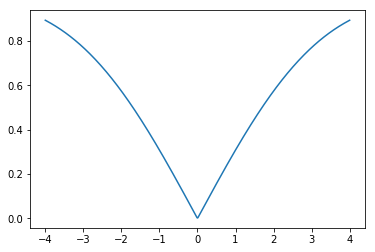

In [2]:
# define the function f and plot on the interval (-4, 4)
f = lambda x: np.sqrt(1-np.exp(-x**2/10))
x = np.linspace(-4, 4, 500)
plt.plot(x, f(x))


The gradient of that function is

$$g(x) = \nabla f(x) = x \frac{\exp(-x^2/10)}{10f(x)} $$

Create this function g(x), the gradient of f(x), and plot it with the original function on the same plot. Make sure you understand how the values of the the slope of the function f(x).

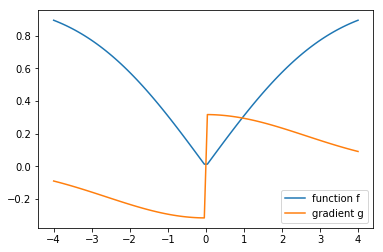

In [3]:
# define the function g and plot on the interval (-4, 4) with f
g = lambda x: x*np.exp(-x**2/10)/(10*f(x))
x = np.linspace(-4, 4, 100)
plt.plot(x, f(x), label="function f")
plt.plot(x, g(x), label="gradient g")
plt.legend();


Write a function `simpleGD` with **inputs**:
* a starting point `x0`
* a function `f`
* the function f's gradient `g`
* a stepsize `gamma`
* and a number of steps, `nr_steps`, to iterate over

and that **returns**: 
* a 2D array of points:
```
    array([[x0, f(x0)],
           [x1, f(x1)],
           ....
           [n_n, f(xn)])
```

To test that this has worked, plot the function f(x) with `10` steps of gradient descent starting at `-3` with a step size of `0.9`

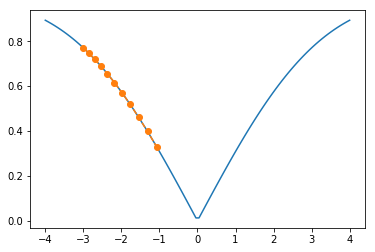

In [4]:
# create the function simpleGD:
def simpleGD(x0, f, g, gamma, nr_steps):
    points = np.zeros((nr_steps+1, 2))
    points[0, :] = [x0, f(x0)]
    x = x0
    for ii in range(nr_steps):
        # this formulation amounts to writing x = x - stepsize*g(x)
        x -= gamma*g(x)
        points[ii+1, :] = [x, f(x)]
    return points

# apply 10 steps of gradient descent to f (with grad g) starting at -3 with gamma 0.9
gd_points = simpleGD(-3, f, g, 0.9, 10)

# and plot the output points from simpleGD with the required settings
x = np.linspace(-4, 4, 100)
plt.plot(x, f(x), label="function f")
plt.plot(*gd_points.T, 'o--')
# The above is a shortcut for a for loop over all the points
# it unpacks the points. Google 'python starred expression'


To show the importance of a good step size, repeat the above procedure with a function $f(x) = x^2$. Take 10 steps of gradient descent starting at `-1` and use `lambda = 1.05`.

What's the problem here?!

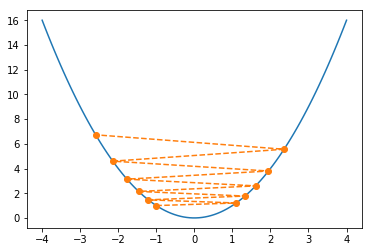

In [5]:
# create a new f and g, apply, and plot the gradient descent
f = lambda x: x**2
g = lambda x: 2*x
gd_points = simpleGD(-1, f, g, 1.05, 10)
x = np.linspace(-4, 4, 100)
plt.plot(x, f(x), label="function f")
plt.plot(*gd_points.T, 'o--')


### Optimisation after transformation (bonus)

*The point of the exercise is to show that when the gradient is "very peaky", you need to be very careful as steps can take you very far away, making the gradient "less peaky" can help smooth the convergence.*

Let's look at the effect of taking transformations of our function on its gradient.

Consider the original function $f(x)=\sqrt{1-\exp(-x^2/10)}$ but now take the square root of it. 

The gradient of the transformed function is:

$\nabla\sqrt{f(x)} = \frac{\nabla f(x)}{2\sqrt{f(x)}}$ 

Repeat the investigation above and observe how things change with different values of lambda, the step size ('learning rate').

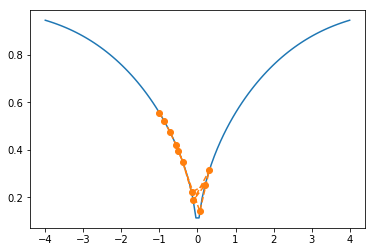

In [6]:
# create a new f and g, apply, and plot the gradient descent
f = lambda x: np.sqrt(1-np.exp(-x**2/10))
g = lambda x: x*np.exp(-x**2/10)/(10*f(x))
f2 = lambda x: np.sqrt(f(x))
g2 = lambda x: g(x)/(2*np.sqrt(f(x)))
gd_points = simpleGD(-1, f2, g2, .5, 10)
x = np.linspace(-4, 4, 100)
plt.plot(x, f2(x))
plt.plot(*gd_points.T, 'o--')


Finally, repeat again, but with `exp(x)` instead of `sqrt(x)`. What do you observe? 

N.B. The gradient of the transformed function is:
$\nabla\exp(f(x)) = \frac{\nabla f(x)}{exp(f(x))}$

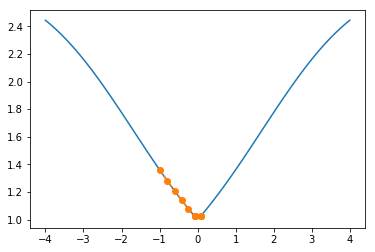

In [7]:
# add your code here for the second case (exp transformation)
f = lambda x: np.sqrt(1-np.exp(-x**2/10))
g = lambda x: x*np.exp(-x**2/10)/(10*f(x))
f3 = lambda x: np.exp(f(x))
g3 = lambda x: g(x)*np.exp(f(x))
gd_points = simpleGD(-1, f3, g3, .5, 10)
x = np.linspace(-4, 4, 100)
plt.plot(x, f3(x))
plt.plot(*gd_points.T, 'o--')
